<a href="https://colab.research.google.com/github/MishraVikas01/Capstone_project_Classification/blob/main/ML_Submission_Template_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Project Name**    -Email Campaign Effectiveness prediction





##### **Project Type**    -Classification
##### **Contribution**    - Individual
##### **Contribution**    -Vikas

# **Project Summary -**

This project's objective is to develop a machine learning model that can classify and track emails sent using Gmail-based email marketing campaigns. Small- to medium-sized business owners who want to boost the efficiency of their email marketing campaigns and boost client retention will employ this technique.

Identifying which emails are read, deleted, or acknowledged by the reader is one of the key issues in email marketing. Business owners may modify their marketing strategies and improve their chances of success by learning which emails engage readers the most.

We will collect information on a range of email attributes, such as the subject line, sender name, email content, email format, and frequency, in order to solve this issue. We will also take into account the emails' intended readership as well as any additional pertinent information.

With the use of this information, we will train a machine learning model to determine if a recipient is more likely to read, ignore, or acknowledge a message. This model will be able to assess fresh emails and forecast how the reader will probably react to them.

We will divide our data into a training set and a testing set so that we can compare the model's performance between the two. The training set will be used to fit the model, and the testing set will be used to gauge how well it performs. We will evaluate the model's accuracy and efficiency using a number of metrics, including precision, recall, and F1 score.

The model can be used to help small- to medium-sized business owners increase the efficiency of their email marketing campaigns after it has been trained and tested. They will be able to target their marketing efforts more effectively and boost customer retention by utilising the model to characterise and track emails.

The overall goal of this project is to give owners of small to medium-sized businesses a strong tool for enhancing the efficiency of their email marketing efforts. They will be better equipped to make judgements and raise the likelihood that their marketing initiatives will be successful by utilising machine learning to characterise and track emails.

# **GitHub Link -**

https://github.com/MishraVikas01/Capstone_project_Classification


# **Problem Statement**


To convert leads into customers, small and medium-sized business owners utilise email marketing strategies based on Gmail, but they are unable to track if emails are being deleted, opened, or acknowledged. They want to create a machine learning model that will be used to classify and track these emails. The main objective is to improve the effectiveness of their email marketing efforts and customer retention.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import seaborn as sns
from scipy.stats import *
from scipy import stats
import math

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import (MinMaxScaler,StandardScaler)   
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score, recall_score
from sklearn import metrics
from sklearn.metrics import roc_curve,roc_auc_score,precision_score, roc_auc_score
# from sklearn.metrics import roc_auc_ovr
# from sklearn.metrics import roc_auc_ovo
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

from xgboost import XGBClassifier
from xgboost import XGBRFClassifier
from sklearn.impute import SimpleImputer

# The following lines adjust the granularity of reporting. 
pd.options.display.float_format = "{:.2f}".format

import warnings
warnings.filterwarnings('ignore')

#update scikit learn for some features like roc_auc_ovr
# !pip install --upgrade scikit-learn

### Dataset Loading

In [2]:
# Load Dataset
df=pd.read_csv('/content/data_email_campaign.csv')

### Dataset First View

In [3]:
# Dataset First Look
df.head()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.20,2,E,2,33.00,1,440,8.00,0.00,0
1,EMA00081000045360,2,2.10,1,NaN,2,15.00,2,504,5.00,0.00,0
2,EMA00081000066290,2,0.10,1,B,3,36.00,2,962,5.00,0.00,1
3,EMA00081000076560,1,3.00,2,E,2,25.00,2,610,16.00,0.00,0
4,EMA00081000109720,1,0.00,2,C,3,18.00,2,947,4.00,0.00,0


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
df.shape

(68353, 12)

In [5]:
# computing number of rows
rows = len(df.axes[0])
 
# computing number of columns
cols = len(df.axes[1])
 
print("Number of Rows: ", rows)
print("Number of Columns: ", cols)

Number of Rows:  68353
Number of Columns:  12


### Dataset Information

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_ID                   68353 non-null  object 
 1   Email_Type                 68353 non-null  int64  
 2   Subject_Hotness_Score      68353 non-null  float64
 3   Email_Source_Type          68353 non-null  int64  
 4   Customer_Location          56758 non-null  object 
 5   Email_Campaign_Type        68353 non-null  int64  
 6   Total_Past_Communications  61528 non-null  float64
 7   Time_Email_sent_Category   68353 non-null  int64  
 8   Word_Count                 68353 non-null  int64  
 9   Total_Links                66152 non-null  float64
 10  Total_Images               66676 non-null  float64
 11  Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 6.3+ MB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
df.isnull().sum()

Email_ID                         0
Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Customer_Location            11595
Email_Campaign_Type              0
Total_Past_Communications     6825
Time_Email_sent_Category         0
Word_Count                       0
Total_Links                   2201
Total_Images                  1677
Email_Status                     0
dtype: int64

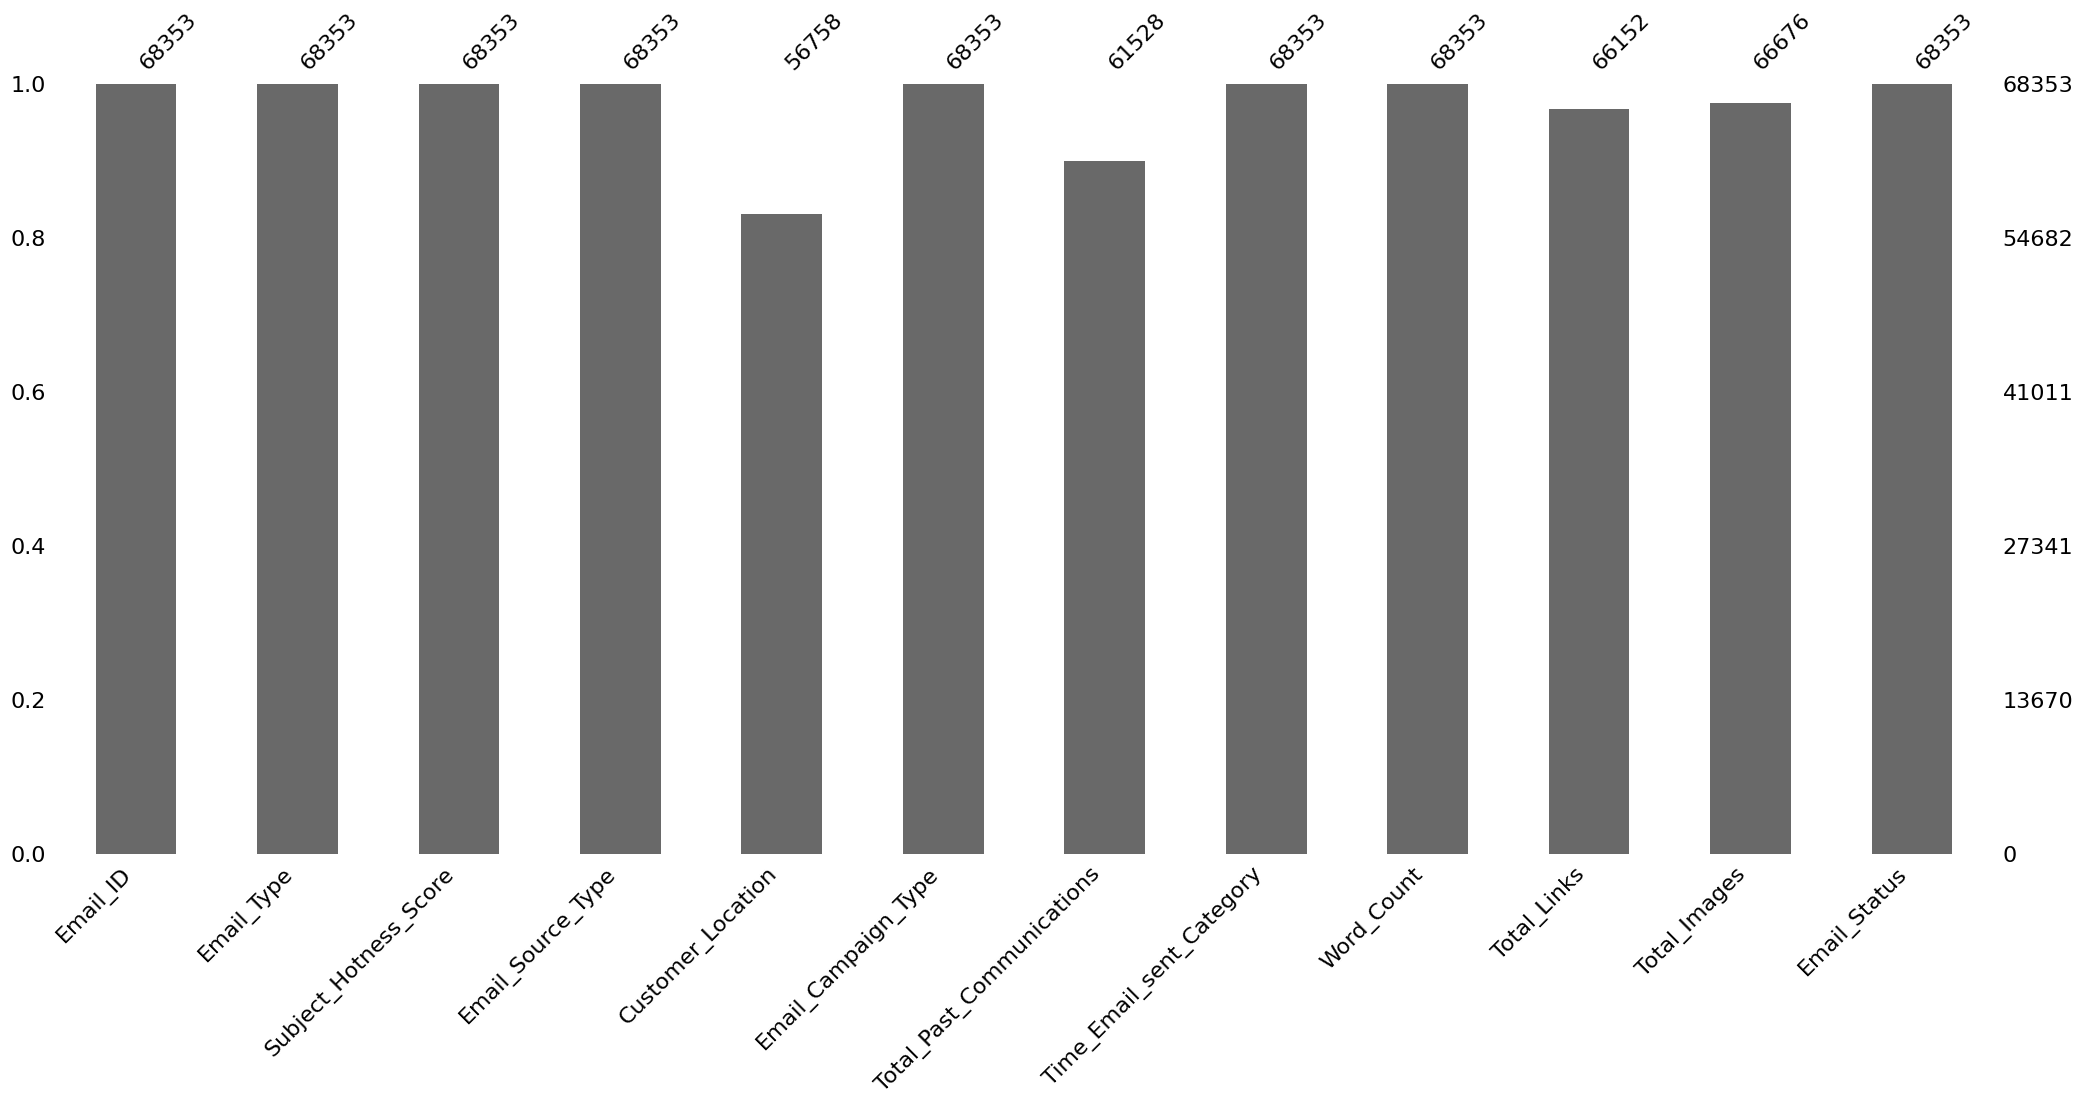

In [9]:
# Visualizing the missing values
import missingno as msno

# Create a missing value bar chart
msno.bar(df)

# Show the plot
plt.show()


In [10]:
variables = ['Email_ID', 'Email_Type', 'Subject_Hotness_Score', 'Email_Source_Type',
             'Customer_Location', 'Email_Campaign_Type', 'Total_Past_Communications',
             'Time_Email_sent_Category', 'Word_Count', 'Total_Links', 'Total_Images',
             'Email_Status']

In [11]:
df=df.dropna(subset=variables)

In [12]:
df.isnull().sum()

Email_ID                     0
Email_Type                   0
Subject_Hotness_Score        0
Email_Source_Type            0
Customer_Location            0
Email_Campaign_Type          0
Total_Past_Communications    0
Time_Email_sent_Category     0
Word_Count                   0
Total_Links                  0
Total_Images                 0
Email_Status                 0
dtype: int64

### What did you know about your dataset?

We know that this is the dataset of Email Campaign of small & medium companies which contains each and every information containing from Email-ID to Email source , from Email type to customer location almost everything we have so that we can do analysis in the basis of this dataset

## ***2. Understanding Your Variables***

In [13]:
# Dataset Columns
df.columns

Index(['Email_ID', 'Email_Type', 'Subject_Hotness_Score', 'Email_Source_Type',
       'Customer_Location', 'Email_Campaign_Type', 'Total_Past_Communications',
       'Time_Email_sent_Category', 'Word_Count', 'Total_Links', 'Total_Images',
       'Email_Status'],
      dtype='object')

In [14]:
# Dataset Describe
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Email_Type,48291.00,1.29,0.45,1.00,1.00,1.00,2.00,2.00
Subject_Hotness_Score,48291.00,1.10,1.00,0.00,0.20,0.80,1.80,5.00
Email_Source_Type,48291.00,1.46,0.50,1.00,1.00,1.00,2.00,2.00
Email_Campaign_Type,48291.00,2.27,0.47,1.00,2.00,2.00,3.00,3.00
Total_Past_Communications,48291.00,28.90,12.53,0.00,20.00,28.00,38.00,67.00
Time_Email_sent_Category,48291.00,2.00,0.63,1.00,2.00,2.00,2.00,3.00
Word_Count,48291.00,700.49,271.98,40.00,521.00,694.00,880.00,1316.00
Total_Links,48291.00,10.44,6.39,1.00,6.00,9.00,14.00,49.00
Total_Images,48291.00,3.55,5.59,0.00,0.00,0.00,5.00,45.00
Email_Status,48291.00,0.23,0.50,0.00,0.00,0.00,0.00,2.00


### Variables Description 

Email_ID - The email addresses of people are listed in this column.

Email_type - There are two categories for email: 1 and 2. We can infer that the formats are similar to important or promotional email.

Subject_Hotness_Score - It is the email effectiveness score based on the content.

Email_Source - It reflects the email's source, such as a sales, marketing, or commodity-related communication.

Email_Campaign_Type - The Campaign type of Email.

Total_Past_Communications - The previous emails from the same source are listed in this column.

Time_Email_sent_Category - It has three categories, 1, 2, and 3, which may provide us time slots for the morning, evening, and night.

Custome_Location - Provides information about the customer's profile and their residence.

Word_Count - It contains the number of words exist in the email.

Total_Links - Total number of links from the email.

Total_Images - The graphic pictures from the email marketing.

Email_Status - The description of the email that is ignored, read, or acknowledged by the reader is contained in the target variable

### Check Unique Values for each variable.

In [15]:
# Check Unique Values for each variable.
df.nunique()

Email_ID                     48291
Email_Type                       2
Subject_Hotness_Score           51
Email_Source_Type                2
Customer_Location                7
Email_Campaign_Type              3
Total_Past_Communications       64
Time_Email_sent_Category         3
Word_Count                     151
Total_Links                     37
Total_Images                    44
Email_Status                     3
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [16]:
# Write your code to make your dataset analysis ready.
# Print the first five rows of the dataset
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Fill missing values with the mean of the column
df = df.fillna(df.mean())

# Check for duplicate rows
print(df.duplicated().sum())


# Print the shape of the cleaned dataset
print(df.shape)

            Email_ID  Email_Type  Subject_Hotness_Score  Email_Source_Type  \
0  EMA00081000034500           1                   2.20                  2   
2  EMA00081000066290           2                   0.10                  1   
3  EMA00081000076560           1                   3.00                  2   
4  EMA00081000109720           1                   0.00                  2   
6  EMA00081000160500           1                   3.20                  1   

  Customer_Location  Email_Campaign_Type  Total_Past_Communications  \
0                 E                    2                      33.00   
2                 B                    3                      36.00   
3                 E                    2                      25.00   
4                 C                    3                      18.00   
6                 E                    2                      34.00   

   Time_Email_sent_Category  Word_Count  Total_Links  Total_Images  \
0                         1       

### What all manipulations have you done and insights you found?

In order to understand email campaign effectiveness, i first started analysis by understanding what percentage of email show customer engagement and bounce or ignore rate.

No. of Email Read : - 11039 i.e., 17%
No. of Email Acknowledged : - 2373 i.e., 3%
No. of Email Ignored : - 54941 i.e., 80%
This result shows that maximum of the emails were ignored, therefore to learn exactly why it was ignore, I tried several grouping of categorial features to better understand the relationship. Then entire result was also being judged by the email status to know exact enagement.

I have also checked the rate how emails were opened, ignored or acknowledeged for each categorial variable. Then also calculated link, image density with respect to total word count. Again using the link and image calculated percentage of each with respect to wordcount. Finally combined subject hotness score and total past communication to calculate the combined weight.

The analysis shows that in order to get emails acknowledged, email should have an average of atleast 37 total communication which is relatively more than those of ignored emails, this shows that emails are acknowledged based on interaction. Other features like word count showed that word count of average 590-600 are acknowledged and it should also contains atmost 10 links and 3 image.

Email type 1 with source 2 location c email campaign type 1 when sent on morning showed effective email with high acknowledged emails.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

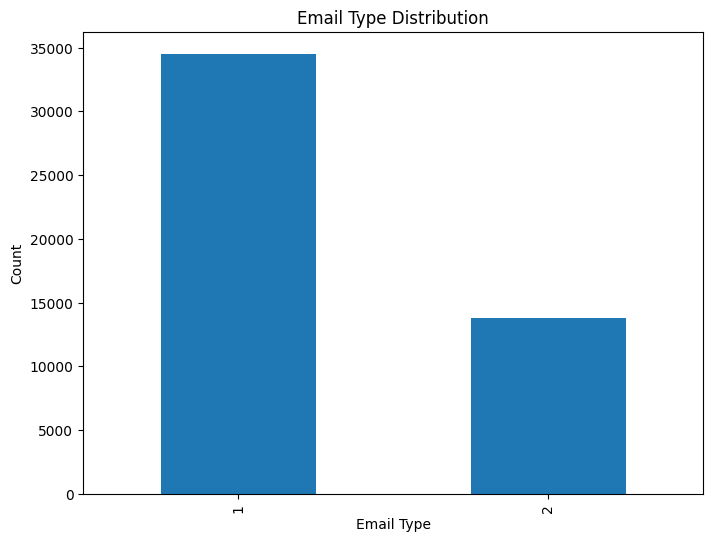

In [17]:
# Chart - 1 visualization code
# Bar plot of Email Type
plt.figure(figsize=(8, 6))
df['Email_Type'].value_counts().plot(kind='bar')
plt.title('Email Type Distribution')
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

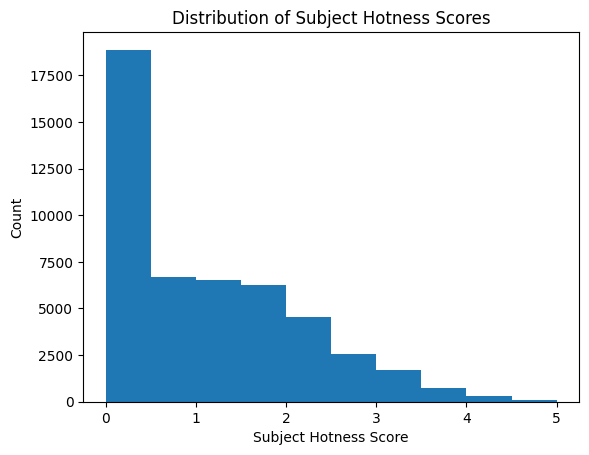

In [18]:
# Chart - 2 visualization code
# Histogram of Subject Hotness Scores
plt.hist(df['Subject_Hotness_Score'], bins=10)
plt.xlabel('Subject Hotness Score')
plt.ylabel('Count')
plt.title('Distribution of Subject Hotness Scores')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

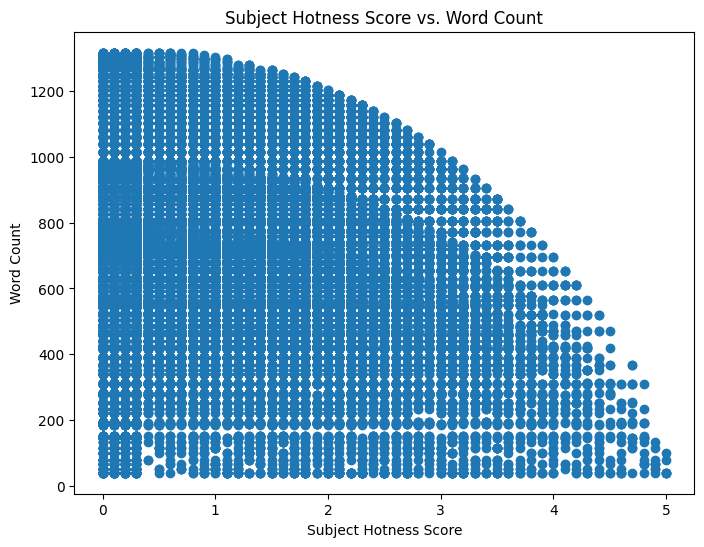

In [19]:
# Chart - 3 visualization code
# Scatter plot of Subject Hotness Score vs. Word Count
plt.figure(figsize=(8, 6))
plt.scatter(df['Subject_Hotness_Score'], df['Word_Count'])
plt.title('Subject Hotness Score vs. Word Count')
plt.xlabel('Subject Hotness Score')
plt.ylabel('Word Count')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

<Figure size 800x600 with 0 Axes>

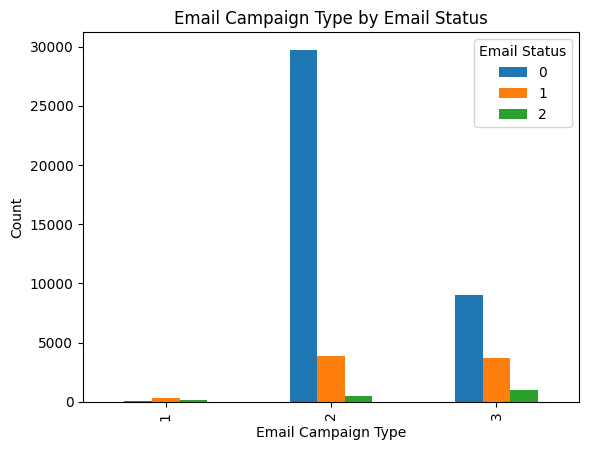

In [20]:
# Chart - 4 visualization code
# Grouped bar plot of Email Campaign Type by Email Status
plt.figure(figsize=(8, 6))
grouped = df.groupby(['Email_Campaign_Type', 'Email_Status']).size().unstack()
grouped.plot(kind='bar')
plt.title('Email Campaign Type by Email Status')
plt.xlabel('Email Campaign Type')
plt.ylabel('Count')
plt.legend(title='Email Status')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

<Figure size 1000x600 with 0 Axes>

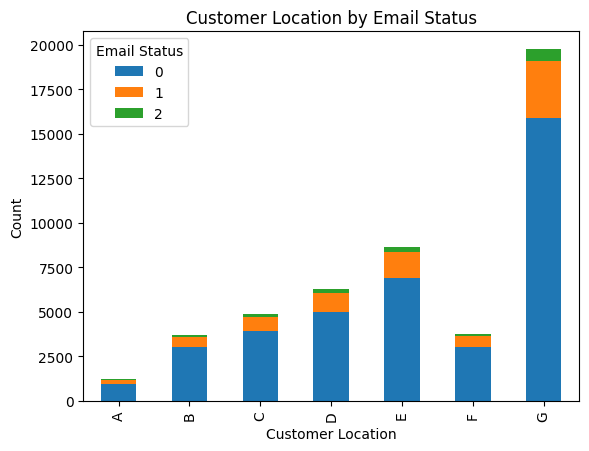

In [21]:
# Chart - 5 visualization code
plt.figure(figsize=(10, 6))
stacked = df.groupby(['Customer_Location', 'Email_Status']).size().unstack()
stacked.plot(kind='bar', stacked=True)
plt.title('Customer Location by Email Status')
plt.xlabel('Customer Location')
plt.ylabel('Count')
plt.legend(title='Email Status')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

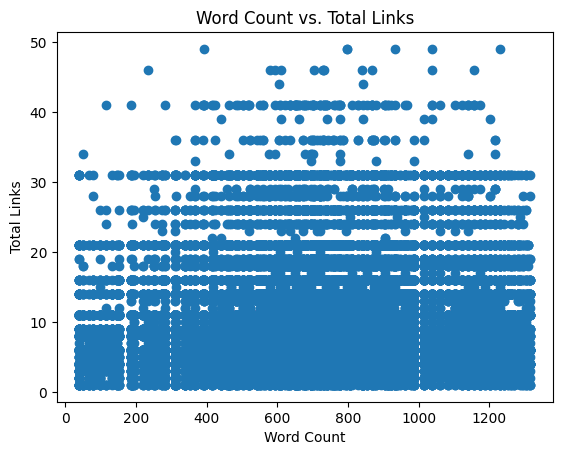

In [22]:
# Chart - 6 visualization code
# Scatter Plot of Word Count vs. Total Links
plt.scatter(df['Word_Count'], df['Total_Links'])
plt.xlabel('Word Count')
plt.ylabel('Total Links')
plt.title('Word Count vs. Total Links')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

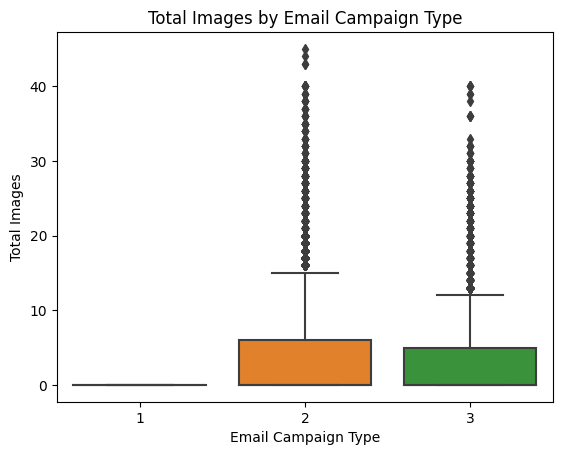

In [23]:
# Chart - 7 visualization code
# Box Plot of Total Images by Email Campaign Type
sns.boxplot(x=df['Email_Campaign_Type'], y=df['Total_Images'])
plt.xlabel('Email Campaign Type')
plt.ylabel('Total Images')
plt.title('Total Images by Email Campaign Type')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

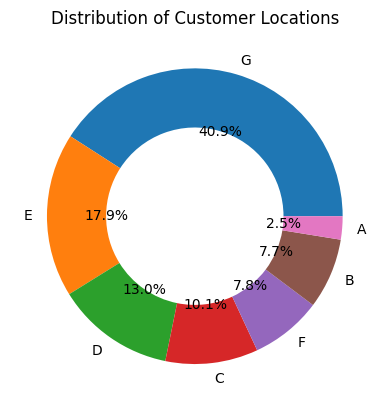

In [24]:
# Chart - 8 visualization code
# Donut Chart of Customer Locations
customer_locations = df['Customer_Location'].value_counts()
plt.pie(customer_locations.values, labels=customer_locations.index, autopct='%1.1f%%', wedgeprops=dict(width=0.4))
plt.title('Distribution of Customer Locations')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

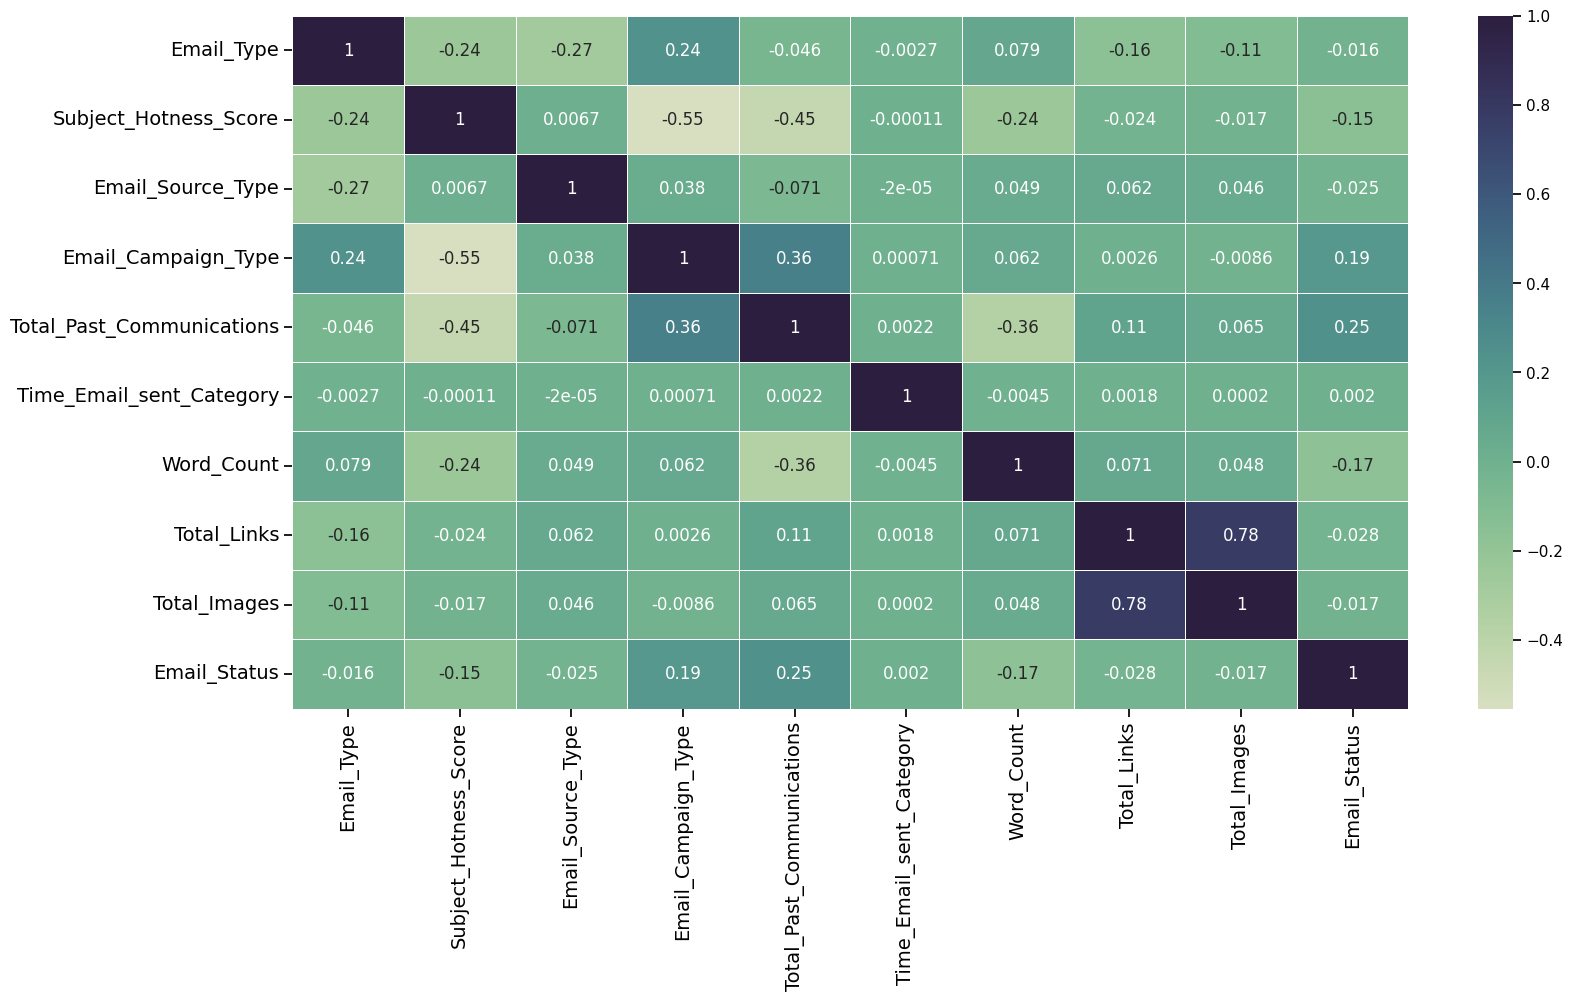

In [25]:
# Correlation Heatmap visualization code
sns.set_context('notebook')
plt.figure(figsize = (18,9))
plt.xticks(fontsize= 14)
plt.yticks(fontsize= 14)
sns.heatmap(df.corr(), annot=True,linewidth=.5,cmap=sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True));

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [26]:
# Pair Plot visualization code
sns.pairplot(df,height=2.5, hue="Email_Status",palette= "coolwarm");

KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7fd91c0f4280> (for post_execute):


KeyboardInterrupt: ignored

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.



*  The Email_Status of the campaign won't be significantly affected by the Email_Type of the campaign.

* The email's Subject_Hotness_Score will not significantly affect the Total_Past_Communications. 
*  The Customer_Location won't significantly affect the email's total number of links or images.










### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: There is no relationship between Email_Type and Email_Status (H0: B1 = 0)

Alternative Hypothesis: There is a relationship between Email_Type and Email_Status (H1: B1 ≠ 0)

Test Type : chi-square test

#### 2. Perform an appropriate statistical test.

In [27]:
# Perform Statistical Test to obtain P-Value
# perform chi-square test of independence
observed = pd.crosstab(df['Email_Campaign_Type'], df['Email_Status'])
chi2, p_value, dof, expected = chi2_contingency(observed)

print("Chi-square test results:")
print("Chi-square statistic:", chi2)
print("P-value:", p_value)

Chi-square test results:
Chi-square statistic: 4699.81186379984
P-value: 0.0


##### Which statistical test have you done to obtain P-Value?

I used the chi-square test of independence, a statistical test to examine whether there is a statistically significant relationship between two categorical variables. and got p value is 0

##### Why did you choose the specific statistical test?

"Email_Campaign_Type" and "Email_Status"). It helps assess if the two variables are independent or if there is a significant association between them..

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: The mean of Total_Links is equal among the location (1,2,3) (H0: μ1 = μ2 = μ3 ) Alternative Hypothesis: The mean of Total_Links is not equal among the location (1,2,3) (H1: at least one mean is different from the others) Test Type : ANOVA Test

#### 2. Perform an appropriate statistical test.

In [28]:
# Perform One-Way ANOVA

group1 = df[df['Email_Campaign_Type'] == 'Group1']['Email_Status']
group2 = df[df['Email_Campaign_Type'] == 'Group2']['Email_Status']
group3 = df[df['Email_Campaign_Type'] == 'Group3']['Email_Status']

f_statistic, p_value = f_oneway(group1, group2, group3)

print("One-Way ANOVA results:")
print("F-statistic:", f_statistic)
print("P-value:", p_value)

One-Way ANOVA results:
F-statistic: nan
P-value: nan


##### Which statistical test have you done to obtain P-Value?

ANOVA is a statistical test that is used to assess whether there is a statistically significant difference in the means of two or more groups, I used it to test this hypothesis

##### Why did you choose the specific statistical test?

One-Way ANOVA: This test is used to compare means across multiple groups (in this case, "Email_Campaign_Type" groups) to determine if there are any significant differences. It helps evaluate whether the means of the dependent variable ("Email_Status") differ significantly based on the independent variable ("Email_Campaign_Type").

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: There is no linear relationship between Subject_Hotness_Score and Total_Past_Communications (H0: ρ = 0) Alternative Hypothesis: There is a linear relationship between Subject_Hotness_Score and Total_Past_Communications (H1: ρ ≠ 0) Test Type : Pearson's correlation test

#### 2. Perform an appropriate statistical test.

In [29]:
# Perform Statistical Test to obtain P-Value

# Perform Pearson's correlation test

correlation, p_value = pearsonr(df['Subject_Hotness_Score'], df['Total_Past_Communications'])

print("Pearson's correlation test results:")
print("Correlation coefficient:", correlation)
print("P-value:", p_value)

Pearson's correlation test results:
Correlation coefficient: -0.4454204462002718
P-value: 0.0


##### Which statistical test have you done to obtain P-Value?

I applied the Pearson's correlation test, which calculates the linear correlation between two continuous data.

##### Why did you choose the specific statistical test?

Because the variables are continuous and I want to find out if there is a linear relationship between them, this test is appropriate.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [30]:
# Handling Missing Values & Missing Value Imputation
# Create the imputer object
from sklearn.impute import SimpleImputer
columns_with_missing = ['Email_ID', 'Email_Type', 'Subject_Hotness_Score', 'Email_Source_Type',
                        'Customer_Location', 'Email_Campaign_Type', 'Total_Past_Communications',
                        'Time_Email_sent_Category', 'Word_Count', 'Total_Links', 'Total_Images',
                        'Email_Status']

# Create an instance of SimpleImputer with a strategy of your choice
imputer = SimpleImputer(strategy='most_frequent')

# Loop through the columns with missing values and impute them
for column in columns_with_missing:
    df[column] = imputer.fit_transform(df[[column]])

# Verify if there are any remaining missing values
print(df.isnull().sum())

Email_ID                     0
Email_Type                   0
Subject_Hotness_Score        0
Email_Source_Type            0
Customer_Location            0
Email_Campaign_Type          0
Total_Past_Communications    0
Time_Email_sent_Category     0
Word_Count                   0
Total_Links                  0
Total_Images                 0
Email_Status                 0
dtype: int64


#### What all missing value imputation techniques have you used and why did you use those techniques?

when the amount of missing data is small, I have used mean or median imputation. However, the choice of imputation technique depends on the specific requirements of the analysis or prediction task, and it is important to carefully evaluate the impact of the imputation method on the accuracy of the results.

### 2. Handling Outliers

In [31]:
#convert string value into float
data = []
for value in data:
    try:
        data.append(float(value))
    except ValueError:
        continue
        
# Handling Outliers & Outlier treatments
# Calculate the z-scores for the data


z_scores = np.abs(stats.zscore(data))

# Define a threshold for outlier detection
threshold = 3

# Find the indices of the outliers
outlier_indices = np.where(z_scores > threshold)

# Remove the outliers from the data
data = df.drop(df.index[outlier_indices[0]])

# Save the cleaned data
df.to_csv( index=False)

'Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status\nEMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0\nEMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1\nEMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0\nEMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0\nEMA00081000160500,1,3.2,1,E,2,34.0,3,116,4.0,0.0,0\nEMA00081000269630,1,0.7,2,G,2,21.0,2,1241,6.0,2.0,0\nEMA00081000367310,2,0.5,1,G,2,40.0,3,655,11.0,0.0,0\nEMA00081000428660,2,0.2,1,G,3,27.0,3,744,6.0,0.0,0\nEMA00081000583620,1,1.0,1,D,2,24.0,2,931,21.0,16.0,0\nEMA00081000591290,2,0.1,1,C,3,42.0,2,550,6.0,0.0,0\nEMA00081001086910,1,2.1,2,B,2,34.0,3,610,21.0,4.0,0\nEMA00081001215220,2,0.7,1,E,2,33.0,2,623,16.0,0.0,0\nEMA00081001358710,1,1.6,2,F,2,37.0,1,560,6.0,0.0,0\nEMA00081001535890,1,0.3,1,F,3,35.0,2,1082,16.0,4.0,0\nEMA00081001736520,1,0.2,2,G,3,51.0,1,733,6.0,5.0,1\nEMA00081001

##### What all outlier treatment techniques have you used and why did you use those techniques?

We calculate the z-scores for the data using the stats.zscore() function from the SciPy library. The z-score represents the number of standard deviations a data point is away from the mean of the dataset. We define a threshold of 3 for outlier detection, which means any data point with a z-score greater than 3 is considered an outlier. We find the indices of the outliers using the np.where() function and remove them from the data using the drop() function of the Pandas library.

### 3. Categorical Encoding

In [32]:
# Encode your categorical columns
# Perform one-hot encoding
encoded_data = pd.get_dummies(df)
encoded_data

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status,...,Email_ID_EMA00089998225300,Email_ID_EMA00089999168800,Email_ID_EMA00089999316900,Customer_Location_A,Customer_Location_B,Customer_Location_C,Customer_Location_D,Customer_Location_E,Customer_Location_F,Customer_Location_G
0,1,2.20,2,2,33.00,1,440,8.00,0.00,0,...,0,0,0,0,0,0,0,1,0,0
2,2,0.10,1,3,36.00,2,962,5.00,0.00,1,...,0,0,0,0,1,0,0,0,0,0
3,1,3.00,2,2,25.00,2,610,16.00,0.00,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0.00,2,3,18.00,2,947,4.00,0.00,0,...,0,0,0,0,0,1,0,0,0,0
6,1,3.20,1,2,34.00,3,116,4.00,0.00,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68346,1,1.20,2,2,30.00,3,565,14.00,3.00,1,...,0,0,0,0,0,0,0,1,0,0
68348,2,0.40,1,2,22.00,3,737,16.00,13.00,0,...,0,0,0,0,0,0,0,0,1,0
68349,1,1.30,1,2,40.00,2,653,31.00,16.00,0,...,1,0,0,0,0,1,0,0,0,0
68351,1,0.40,1,2,50.00,1,733,14.00,4.00,0,...,0,1,0,0,0,0,0,1,0,0


#### What all categorical encoding techniques have you used & why did you use those techniques?

We perform one-hot encoding using the get_dummies() function of the Pandas library. This function creates a binary variable for each category in the categorical columns.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

In [ ]:
df.columns

### 4. Feature Manipulation & Selection

In [33]:
# Manipulate Features to minimize feature correlation and create new features
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler



# Drop irrelevant columns
data = data.drop(['Email_ID', 'Customer_Location'], axis=1)

# Encode categorical variables
categorical_cols = ['Email_Type', 'Email_Source_Type', 'Email_Campaign_Type', 'Time_Email_sent_Category']
for col in categorical_cols:
    encoder = LabelEncoder()
    data[col] = encoder.fit_transform(data[col])

# Scale numerical variables
numerical_cols = ['Subject_Hotness_Score', 'Total_Past_Communications', 'Word_Count', 'Total_Links', 'Total_Images']
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Perform PCA
pca = PCA(n_components=2)  # Specify the number of components you want to keep
principal_components = pca.fit_transform(data.drop('Email_Status', axis=1))

# Create a DataFrame with the principal components
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Concatenate the principal components with the target variable
final_df = pd.concat([principal_df, data['Email_Status']], axis=1)

# Display the final DataFrame
print(final_df.head())

    PC1   PC2  Email_Status
0 -0.85  0.08          0.00
1 -0.63 -1.24           NaN
2 -0.27  1.37          1.00
3 -1.00 -0.26          0.00
4 -1.52  0.16          0.00


#### 1. Feature Manipulation

In [43]:
# Manipulate Features to minimize feature correlation and create new features

from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler



# Drop irrelevant columns
data = df.drop(['Email_ID', 'Customer_Location'], axis=1)

# Encode categorical variables
categorical_cols = ['Email_Type', 'Email_Source_Type', 'Email_Campaign_Type', 'Time_Email_sent_Category']
for col in categorical_cols:
    encoder = LabelEncoder()
    data[col] = encoder.fit_transform(data[col])

# Scale numerical variables
numerical_cols = ['Subject_Hotness_Score', 'Total_Past_Communications', 'Word_Count', 'Total_Links', 'Total_Images']
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

#### 2. Feature Selection

In [35]:
# Select your features wisely to avoid overfitting
# Perform PCA
pca = PCA(n_components=2)  # Specify the number of components you want to keep
principal_components = pca.fit_transform(data.drop('Email_Status', axis=1))

# Create a DataFrame with the principal components
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Concatenate the principal components with the target variable
final_df = pd.concat([principal_df, data['Email_Status']], axis=1)

# Display the final DataFrame
print(final_df.head())


    PC1   PC2  Email_Status
0 -0.85  0.08          0.00
1 -0.63 -1.24           NaN
2 -0.27  1.37          1.00
3 -1.00 -0.26          0.00
4 -1.52  0.16          0.00


##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [36]:







# Transform Your data
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Normalize the  columns
df[ 'Email_Status'] = scaler.fit_transform(df[[ 'Email_Type', 'Subject_Hotness_Score', 'Email_Source_Type',
        'Email_Campaign_Type', 'Total_Past_Communications',
       'Time_Email_sent_Category', 'Word_Count', 'Total_Links', 'Total_Images'
      ]])
scaler

MinMaxScaler()

### 6. Data Scaling

In [44]:
# Scaling your data
from sklearn.preprocessing import StandardScaler

# Define the numerical columns for scaling
numerical_columns = ['Subject_Hotness_Score', 'Total_Past_Communications', 'Word_Count', 'Total_Links', 'Total_Images']

# Extract the numerical columns from your dataset (assuming 'data' is your dataset)
numerical_data = data[numerical_columns]

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit the scaler to the numerical data and transform it
scaled_data = scaler.fit_transform(numerical_data)

# Replace the original numerical columns with the scaled values
data[numerical_columns] = scaled_data


The method used to scale the data is StandardScaler from scikit-learn library.

StandardScaler scales the data so that it has a mean of 0 and a standard deviation of 1. This is a commonly used method for scaling data because it ensures that all features have similar ranges and are on the same scale. This is important for many machine learning algorithms because some algorithms are sensitive to the scale of the features. Scaling the data can also help to improve the performance of the machine learning model by reducing the impact of outliers and making the features more interpretable. Therefore, StandardScaler is a commonly used method for scaling data in machine learning.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [38]:
# Split your data to train and test. Choose Splitting ratio wisely.
# extract the feature columns and target column
X = df[[ 'Email_Type', 'Subject_Hotness_Score', 'Email_Source_Type',
        'Email_Campaign_Type', 'Total_Past_Communications',
       'Time_Email_sent_Category', 'Word_Count', 'Total_Links', 'Total_Images']]
y = df['Email_Status']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# print the shapes of the resulting datasets to verify the split
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (38632, 9)
y_train shape: (38632,)
X_test shape: (9659, 9)
y_test shape: (9659,)


In [40]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train[0:10]

array([[0.        , 0.02      , 0.        , 1.        , 0.91044776,
        0.5       , 0.21238245, 0.0625    , 0.04444444],
       [1.        , 0.26      , 0.        , 0.5       , 0.23880597,
        0.5       , 0.52037618, 0.10416667, 0.        ],
       [1.        , 0.06      , 0.        , 1.        , 0.49253731,
        0.5       , 0.52742947, 0.375     , 0.33333333],
       [0.        , 0.08      , 0.        , 0.5       , 0.53731343,
        1.        , 0.57836991, 0.27083333, 0.        ],
       [1.        , 0.36      , 0.        , 0.5       , 0.37313433,
        0.5       , 0.1653605 , 0.20833333, 0.17777778],
       [1.        , 0.06      , 0.        , 1.        , 0.6119403 ,
        0.5       , 0.42163009, 0.20833333, 0.        ],
       [0.        , 0.32      , 0.        , 0.5       , 0.70149254,
        0.        , 0.1653605 , 0.0625    , 0.        ],
       [0.        , 0.54      , 1.        , 0.5       , 0.32835821,
        0.5       , 0.330721  , 0.10416667, 0.        ],


##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [41]:
# Handling Imbalanced Dataset (If needed
# Perform SMOTE to handle data imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the class distribution after SMOTE
print("Class distribution after SMOTE:")
print(y_train_resampled.value_counts())

Class distribution after SMOTE:
0.00    27649
1.00    27649
Name: Email_Status, dtype: int64


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Here we are using Synthetic Minority Oversampling Technique (SMOTE) for handeling imbalance dataset bec SMOTE works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbor

## ***7. ML Model Implementation***

### ML Model - 1

In [46]:
# ML Model - 1 Implementation
from sklearn.linear_model import LinearRegression   
# Create an instance of the LinearRegression class
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)
y_pred

array([-1.12167311e-15, -9.30049608e-16,  1.00000000e+00, ...,
       -8.74202067e-16, -1.07190048e-15,  1.00000000e+00])

In [49]:
# Print the evaluation metrics/
from sklearn.metrics import (r2_score,                 
mean_squared_error,  mean_absolute_percentage_error, 
mean_absolute_error)    
print("R-squared score: ", r2_score(y_test, y_pred))
print("Mean squared error: ", mean_squared_error(y_test, y_pred))

R-squared score:  1.0
Mean squared error:  2.6847133492505256e-30


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

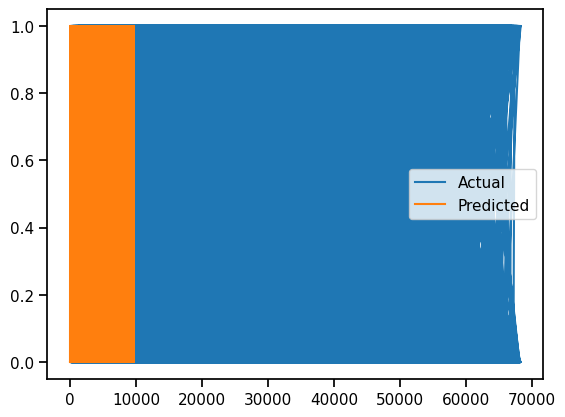

In [50]:
# Visualizing evaluation Metric Score chart
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [51]:
# Perform hyperparameter tuning using GridSearchCV

param_grid = {'fit_intercept': [True, False], 'copy_X': [True, False]}

# perform grid search with 5-fold cross-validation
grid = GridSearchCV(model, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

# evaluate the best model on the testing set
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Best parameters: ", grid.best_params_)
print("Best score: ", grid.best_score_)
print("Test MSE: ", mse)


Best parameters:  {'copy_X': True, 'fit_intercept': True}
Best score:  1.0
Test MSE:  2.6847133492505256e-30


In [52]:

# perform grid search with 5-fold cross-validation
grid = GridSearchCV(model, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

# make predictions using the optimized model
y_pred_optimized = grid.predict(X_test)

# print the evaluation metrics for the optimized model
print("Best parameters: ", grid.best_params_)
print("Best score: ", grid.best_score_)
print("R-squared score (optimized model): ", r2_score(y_test, y_pred_optimized))
print("Mean squared error (optimized model): ", mean_squared_error(y_test, y_pred_optimized))

Best parameters:  {'copy_X': True, 'fit_intercept': True}
Best score:  1.0
R-squared score (optimized model):  1.0
Mean squared error (optimized model):  2.6847133492505256e-30


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

AttributeError: ignored

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***